Date <12/10/2025>
Written by <Haipei Xu> <hx2385@columbia.edu>
The code has not been generated by AI tools, or copied from an external resource


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/ECBM4040/Final/CIFAR-10

/content/drive/MyDrive/Colab Notebooks/ECBM4040/Final/CIFAR-10


In [5]:
# !python train.py --lr-max=0.05 --ra-n=2 --ra-m=12 --wd=0.005 --scale=1.0 --jitter=0 --reprob=0

In [4]:
import subprocess

ks_list = [3, 5, 7]
ps_list = [1, 2, 4]

for ks in ks_list:
    for ps in ps_list:
        name = f"ks{ks}_ps{ps}"
        print(f"\n====== Running {name} ======\n")

        cmd = [
            "python", "train.py",
            f"--conv-ks={ks}",
            f"--psize={ps}",
            "--hdim=256",
            "--depth=8",
            "--lr-max=0.05",
            "--ra-n=2",
            "--ra-m=12",
            "--wd=0.005",
            "--scale=1.0",
            "--jitter=0",
            "--reprob=0",
            f"--name={name}"
        ]


        process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)

        for line in process.stdout:
            print(line, end="")

        process.wait()



====== Running ks3_ps1 ======

/content/drive/MyDrive/Colab Notebooks/ECBM4040/Final/CIFAR-10/train.py:104: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/content/drive/MyDrive/Colab Notebooks/ECBM4040/Final/CIFAR-10/train.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/content/drive/MyDrive/Colab Notebooks/ECBM4040/Final/CIFAR-10/train.py:138: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
[ks3_ps1] Epoch: 0 | Train Acc: 0.3960, Test Acc: 0.4762, Time: 73.4, lr: 0.005000
[ks3_ps1] Epoch: 1 | Train Acc: 0.5910, Test Acc: 0.5954, Time: 73.2, lr: 0.010000
[ks3_ps1] Epoch: 2 | Train Acc: 0.6716, Test Acc: 0.6961, Time: 73.6, lr: 0.015000
[ks3_ps1

Parsed runs: ['ks3_ps1', 'ks3_ps2', 'ks3_ps4', 'ks5_ps1', 'ks5_ps2', 'ks5_ps4', 'ks7_ps1', 'ks7_ps2', 'ks7_ps4']


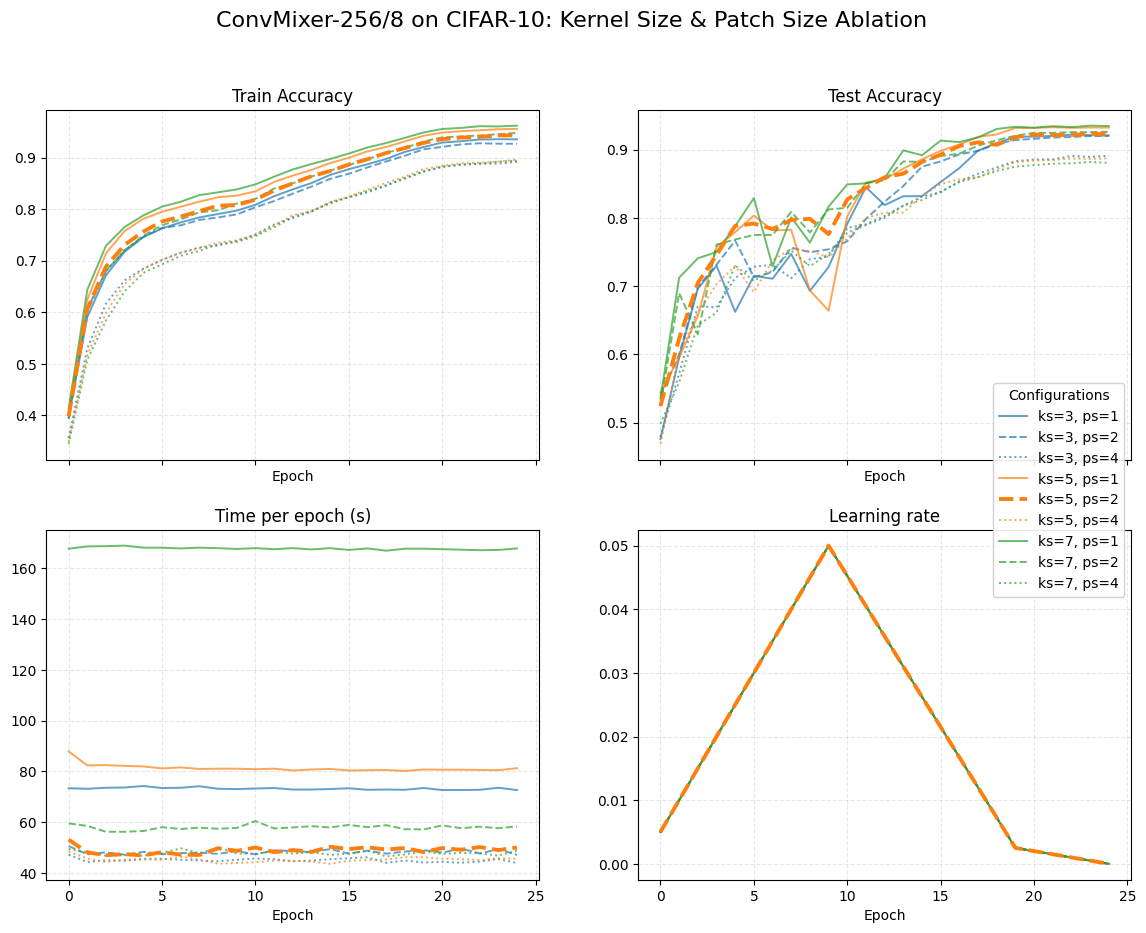

In [9]:
import re
import collections
import matplotlib.pyplot as plt


log = """
[ks3_ps1] Epoch: 0 | Train Acc: 0.3960, Test Acc: 0.4762, Time: 73.4, lr: 0.005000
[ks3_ps1] Epoch: 1 | Train Acc: 0.5910, Test Acc: 0.5954, Time: 73.2, lr: 0.010000
[ks3_ps1] Epoch: 2 | Train Acc: 0.6716, Test Acc: 0.6961, Time: 73.6, lr: 0.015000
[ks3_ps1] Epoch: 3 | Train Acc: 0.7174, Test Acc: 0.7298, Time: 73.7, lr: 0.020000
[ks3_ps1] Epoch: 4 | Train Acc: 0.7457, Test Acc: 0.6623, Time: 74.3, lr: 0.025000
[ks3_ps1] Epoch: 5 | Train Acc: 0.7625, Test Acc: 0.7150, Time: 73.5, lr: 0.030000
[ks3_ps1] Epoch: 6 | Train Acc: 0.7743, Test Acc: 0.7108, Time: 73.6, lr: 0.035000
[ks3_ps1] Epoch: 7 | Train Acc: 0.7839, Test Acc: 0.7470, Time: 74.2, lr: 0.040000
[ks3_ps1] Epoch: 8 | Train Acc: 0.7905, Test Acc: 0.6931, Time: 73.2, lr: 0.045000
[ks3_ps1] Epoch: 9 | Train Acc: 0.7971, Test Acc: 0.7279, Time: 73.1, lr: 0.050000
[ks3_ps1] Epoch: 10 | Train Acc: 0.8083, Test Acc: 0.7913, Time: 73.3, lr: 0.045250
[ks3_ps1] Epoch: 11 | Train Acc: 0.8250, Test Acc: 0.8448, Time: 73.5, lr: 0.040500
[ks3_ps1] Epoch: 12 | Train Acc: 0.8383, Test Acc: 0.8186, Time: 72.9, lr: 0.035750
[ks3_ps1] Epoch: 13 | Train Acc: 0.8505, Test Acc: 0.8316, Time: 72.9, lr: 0.031000
[ks3_ps1] Epoch: 14 | Train Acc: 0.8663, Test Acc: 0.8317, Time: 73.1, lr: 0.026250
[ks3_ps1] Epoch: 15 | Train Acc: 0.8774, Test Acc: 0.8525, Time: 73.4, lr: 0.021500
[ks3_ps1] Epoch: 16 | Train Acc: 0.8870, Test Acc: 0.8728, Time: 72.8, lr: 0.016750
[ks3_ps1] Epoch: 17 | Train Acc: 0.8972, Test Acc: 0.8984, Time: 72.9, lr: 0.012000
[ks3_ps1] Epoch: 18 | Train Acc: 0.9109, Test Acc: 0.9094, Time: 72.8, lr: 0.007250
[ks3_ps1] Epoch: 19 | Train Acc: 0.9203, Test Acc: 0.9189, Time: 73.5, lr: 0.002500
[ks3_ps1] Epoch: 20 | Train Acc: 0.9290, Test Acc: 0.9189, Time: 72.7, lr: 0.002000
[ks3_ps1] Epoch: 21 | Train Acc: 0.9316, Test Acc: 0.9199, Time: 72.7, lr: 0.001500
[ks3_ps1] Epoch: 22 | Train Acc: 0.9348, Test Acc: 0.9216, Time: 72.8, lr: 0.001000
[ks3_ps1] Epoch: 23 | Train Acc: 0.9355, Test Acc: 0.9210, Time: 73.6, lr: 0.000500
[ks3_ps1] Epoch: 24 | Train Acc: 0.9352, Test Acc: 0.9205, Time: 72.7, lr: 0.000000

[ks3_ps2] Epoch: 0 | Train Acc: 0.4030, Test Acc: 0.5378, Time: 50.7, lr: 0.005000
[ks3_ps2] Epoch: 1 | Train Acc: 0.6067, Test Acc: 0.5998, Time: 47.4, lr: 0.010000
[ks3_ps2] Epoch: 2 | Train Acc: 0.6795, Test Acc: 0.6987, Time: 48.2, lr: 0.015000
[ks3_ps2] Epoch: 3 | Train Acc: 0.7208, Test Acc: 0.7313, Time: 47.3, lr: 0.020000
[ks3_ps2] Epoch: 4 | Train Acc: 0.7462, Test Acc: 0.7665, Time: 48.4, lr: 0.025000
[ks3_ps2] Epoch: 5 | Train Acc: 0.7636, Test Acc: 0.7131, Time: 47.5, lr: 0.030000
[ks3_ps2] Epoch: 6 | Train Acc: 0.7686, Test Acc: 0.7205, Time: 47.9, lr: 0.035000
[ks3_ps2] Epoch: 7 | Train Acc: 0.7791, Test Acc: 0.7563, Time: 48.1, lr: 0.040000
[ks3_ps2] Epoch: 8 | Train Acc: 0.7839, Test Acc: 0.7497, Time: 47.6, lr: 0.045000
[ks3_ps2] Epoch: 9 | Train Acc: 0.7898, Test Acc: 0.7538, Time: 48.7, lr: 0.050000
[ks3_ps2] Epoch: 10 | Train Acc: 0.8035, Test Acc: 0.7656, Time: 47.4, lr: 0.045250
[ks3_ps2] Epoch: 11 | Train Acc: 0.8156, Test Acc: 0.7984, Time: 49.0, lr: 0.040500
[ks3_ps2] Epoch: 12 | Train Acc: 0.8300, Test Acc: 0.8237, Time: 48.7, lr: 0.035750
[ks3_ps2] Epoch: 13 | Train Acc: 0.8436, Test Acc: 0.8465, Time: 48.3, lr: 0.031000
[ks3_ps2] Epoch: 14 | Train Acc: 0.8587, Test Acc: 0.8749, Time: 49.5, lr: 0.026250
[ks3_ps2] Epoch: 15 | Train Acc: 0.8685, Test Acc: 0.8825, Time: 47.7, lr: 0.021500
[ks3_ps2] Epoch: 16 | Train Acc: 0.8808, Test Acc: 0.8930, Time: 48.9, lr: 0.016750
[ks3_ps2] Epoch: 17 | Train Acc: 0.8924, Test Acc: 0.8980, Time: 47.7, lr: 0.012000
[ks3_ps2] Epoch: 18 | Train Acc: 0.9034, Test Acc: 0.9083, Time: 48.5, lr: 0.007250
[ks3_ps2] Epoch: 19 | Train Acc: 0.9159, Test Acc: 0.9139, Time: 49.1, lr: 0.002500
[ks3_ps2] Epoch: 20 | Train Acc: 0.9207, Test Acc: 0.9157, Time: 48.1, lr: 0.002000
[ks3_ps2] Epoch: 21 | Train Acc: 0.9254, Test Acc: 0.9177, Time: 49.7, lr: 0.001500
[ks3_ps2] Epoch: 22 | Train Acc: 0.9276, Test Acc: 0.9184, Time: 47.8, lr: 0.001000
[ks3_ps2] Epoch: 23 | Train Acc: 0.9268, Test Acc: 0.9198, Time: 49.4, lr: 0.000500
[ks3_ps2] Epoch: 24 | Train Acc: 0.9267, Test Acc: 0.9201, Time: 47.2, lr: 0.000000

[ks3_ps4] Epoch: 0 | Train Acc: 0.3563, Test Acc: 0.4790, Time: 47.3, lr: 0.005000
[ks3_ps4] Epoch: 1 | Train Acc: 0.5302, Test Acc: 0.5718, Time: 44.4, lr: 0.010000
[ks3_ps4] Epoch: 2 | Train Acc: 0.6170, Test Acc: 0.6703, Time: 45.1, lr: 0.015000
[ks3_ps4] Epoch: 3 | Train Acc: 0.6621, Test Acc: 0.6689, Time: 44.9, lr: 0.020000
[ks3_ps4] Epoch: 4 | Train Acc: 0.6847, Test Acc: 0.7119, Time: 45.7, lr: 0.025000
[ks3_ps4] Epoch: 5 | Train Acc: 0.7017, Test Acc: 0.7283, Time: 45.7, lr: 0.030000
[ks3_ps4] Epoch: 6 | Train Acc: 0.7157, Test Acc: 0.7312, Time: 45.3, lr: 0.035000
[ks3_ps4] Epoch: 7 | Train Acc: 0.7256, Test Acc: 0.7116, Time: 45.0, lr: 0.040000
[ks3_ps4] Epoch: 8 | Train Acc: 0.7296, Test Acc: 0.7393, Time: 44.7, lr: 0.045000
[ks3_ps4] Epoch: 9 | Train Acc: 0.7383, Test Acc: 0.7435, Time: 45.3, lr: 0.050000
[ks3_ps4] Epoch: 10 | Train Acc: 0.7510, Test Acc: 0.7852, Time: 45.8, lr: 0.045250
[ks3_ps4] Epoch: 11 | Train Acc: 0.7703, Test Acc: 0.7905, Time: 45.5, lr: 0.040500
[ks3_ps4] Epoch: 12 | Train Acc: 0.7826, Test Acc: 0.8026, Time: 44.7, lr: 0.035750
[ks3_ps4] Epoch: 13 | Train Acc: 0.7949, Test Acc: 0.8178, Time: 45.0, lr: 0.031000
[ks3_ps4] Epoch: 14 | Train Acc: 0.8134, Test Acc: 0.8309, Time: 45.5, lr: 0.026250
[ks3_ps4] Epoch: 15 | Train Acc: 0.8229, Test Acc: 0.8374, Time: 45.9, lr: 0.021500
[ks3_ps4] Epoch: 16 | Train Acc: 0.8322, Test Acc: 0.8534, Time: 46.3, lr: 0.016750
[ks3_ps4] Epoch: 17 | Train Acc: 0.8456, Test Acc: 0.8645, Time: 44.1, lr: 0.012000
[ks3_ps4] Epoch: 18 | Train Acc: 0.8607, Test Acc: 0.8740, Time: 45.0, lr: 0.007250
[ks3_ps4] Epoch: 19 | Train Acc: 0.8729, Test Acc: 0.8829, Time: 44.2, lr: 0.002500
[ks3_ps4] Epoch: 20 | Train Acc: 0.8818, Test Acc: 0.8855, Time: 44.5, lr: 0.002000
[ks3_ps4] Epoch: 21 | Train Acc: 0.8862, Test Acc: 0.8856, Time: 44.1, lr: 0.001500
[ks3_ps4] Epoch: 22 | Train Acc: 0.8880, Test Acc: 0.8906, Time: 44.6, lr: 0.001000
[ks3_ps4] Epoch: 23 | Train Acc: 0.8880, Test Acc: 0.8892, Time: 45.6, lr: 0.000500
[ks3_ps4] Epoch: 24 | Train Acc: 0.8918, Test Acc: 0.8909, Time: 44.0, lr: 0.000000

[ks5_ps1] Epoch: 0 | Train Acc: 0.4041, Test Acc: 0.5443, Time: 87.9, lr: 0.005000
[ks5_ps1] Epoch: 1 | Train Acc: 0.6250, Test Acc: 0.5955, Time: 82.4, lr: 0.010000
[ks5_ps1] Epoch: 2 | Train Acc: 0.7144, Test Acc: 0.6562, Time: 82.5, lr: 0.015000
[ks5_ps1] Epoch: 3 | Train Acc: 0.7577, Test Acc: 0.7570, Time: 82.2, lr: 0.020000
[ks5_ps1] Epoch: 4 | Train Acc: 0.7813, Test Acc: 0.7790, Time: 82.0, lr: 0.025000
[ks5_ps1] Epoch: 5 | Train Acc: 0.7948, Test Acc: 0.8034, Time: 81.2, lr: 0.030000
[ks5_ps1] Epoch: 6 | Train Acc: 0.8046, Test Acc: 0.7817, Time: 81.6, lr: 0.035000
[ks5_ps1] Epoch: 7 | Train Acc: 0.8144, Test Acc: 0.7823, Time: 81.0, lr: 0.040000
[ks5_ps1] Epoch: 8 | Train Acc: 0.8231, Test Acc: 0.6936, Time: 81.1, lr: 0.045000
[ks5_ps1] Epoch: 9 | Train Acc: 0.8262, Test Acc: 0.6640, Time: 81.1, lr: 0.050000
[ks5_ps1] Epoch: 10 | Train Acc: 0.8344, Test Acc: 0.8022, Time: 80.9, lr: 0.045250
[ks5_ps1] Epoch: 11 | Train Acc: 0.8526, Test Acc: 0.8516, Time: 81.1, lr: 0.040500
[ks5_ps1] Epoch: 12 | Train Acc: 0.8650, Test Acc: 0.8563, Time: 80.4, lr: 0.035750
[ks5_ps1] Epoch: 13 | Train Acc: 0.8760, Test Acc: 0.8721, Time: 80.8, lr: 0.031000
[ks5_ps1] Epoch: 14 | Train Acc: 0.8892, Test Acc: 0.8858, Time: 81.0, lr: 0.026250
[ks5_ps1] Epoch: 15 | Train Acc: 0.8996, Test Acc: 0.8981, Time: 80.4, lr: 0.021500
[ks5_ps1] Epoch: 16 | Train Acc: 0.9120, Test Acc: 0.9073, Time: 80.5, lr: 0.016750
[ks5_ps1] Epoch: 17 | Train Acc: 0.9205, Test Acc: 0.9186, Time: 80.6, lr: 0.012000
[ks5_ps1] Epoch: 18 | Train Acc: 0.9313, Test Acc: 0.9221, Time: 80.2, lr: 0.007250
[ks5_ps1] Epoch: 19 | Train Acc: 0.9422, Test Acc: 0.9316, Time: 80.8, lr: 0.002500
[ks5_ps1] Epoch: 20 | Train Acc: 0.9483, Test Acc: 0.9316, Time: 80.7, lr: 0.002000
[ks5_ps1] Epoch: 21 | Train Acc: 0.9510, Test Acc: 0.9328, Time: 80.7, lr: 0.001500
[ks5_ps1] Epoch: 22 | Train Acc: 0.9529, Test Acc: 0.9317, Time: 80.6, lr: 0.001000
[ks5_ps1] Epoch: 23 | Train Acc: 0.9548, Test Acc: 0.9322, Time: 80.5, lr: 0.000500
[ks5_ps1] Epoch: 24 | Train Acc: 0.9555, Test Acc: 0.9321, Time: 81.3, lr: 0.000000

[ks5_ps2] Epoch: 0 | Train Acc: 0.3985, Test Acc: 0.5242, Time: 53.2, lr: 0.005000
[ks5_ps2] Epoch: 1 | Train Acc: 0.6068, Test Acc: 0.6229, Time: 48.2, lr: 0.010000
[ks5_ps2] Epoch: 2 | Train Acc: 0.6887, Test Acc: 0.7047, Time: 47.1, lr: 0.015000
[ks5_ps2] Epoch: 3 | Train Acc: 0.7308, Test Acc: 0.7455, Time: 47.5, lr: 0.020000
[ks5_ps2] Epoch: 4 | Train Acc: 0.7565, Test Acc: 0.7882, Time: 47.0, lr: 0.025000
[ks5_ps2] Epoch: 5 | Train Acc: 0.7761, Test Acc: 0.7916, Time: 48.3, lr: 0.030000
[ks5_ps2] Epoch: 6 | Train Acc: 0.7855, Test Acc: 0.7836, Time: 47.3, lr: 0.035000
[ks5_ps2] Epoch: 7 | Train Acc: 0.7961, Test Acc: 0.7969, Time: 47.2, lr: 0.040000
[ks5_ps2] Epoch: 8 | Train Acc: 0.8067, Test Acc: 0.7985, Time: 49.8, lr: 0.045000
[ks5_ps2] Epoch: 9 | Train Acc: 0.8077, Test Acc: 0.7761, Time: 48.8, lr: 0.050000
[ks5_ps2] Epoch: 10 | Train Acc: 0.8185, Test Acc: 0.8270, Time: 50.1, lr: 0.045250
[ks5_ps2] Epoch: 11 | Train Acc: 0.8359, Test Acc: 0.8437, Time: 48.3, lr: 0.040500
[ks5_ps2] Epoch: 12 | Train Acc: 0.8501, Test Acc: 0.8593, Time: 49.1, lr: 0.035750
[ks5_ps2] Epoch: 13 | Train Acc: 0.8637, Test Acc: 0.8647, Time: 48.4, lr: 0.031000
[ks5_ps2] Epoch: 14 | Train Acc: 0.8738, Test Acc: 0.8818, Time: 50.4, lr: 0.026250
[ks5_ps2] Epoch: 15 | Train Acc: 0.8864, Test Acc: 0.8924, Time: 49.5, lr: 0.021500
[ks5_ps2] Epoch: 16 | Train Acc: 0.8967, Test Acc: 0.9052, Time: 50.2, lr: 0.016750
[ks5_ps2] Epoch: 17 | Train Acc: 0.9088, Test Acc: 0.9106, Time: 49.3, lr: 0.012000
[ks5_ps2] Epoch: 18 | Train Acc: 0.9184, Test Acc: 0.9070, Time: 49.9, lr: 0.007250
[ks5_ps2] Epoch: 19 | Train Acc: 0.9283, Test Acc: 0.9180, Time: 48.3, lr: 0.002500
[ks5_ps2] Epoch: 20 | Train Acc: 0.9357, Test Acc: 0.9219, Time: 49.9, lr: 0.002000
[ks5_ps2] Epoch: 21 | Train Acc: 0.9387, Test Acc: 0.9212, Time: 49.2, lr: 0.001500
[ks5_ps2] Epoch: 22 | Train Acc: 0.9399, Test Acc: 0.9214, Time: 50.3, lr: 0.001000
[ks5_ps2] Epoch: 23 | Train Acc: 0.9428, Test Acc: 0.9228, Time: 49.1, lr: 0.000500
[ks5_ps2] Epoch: 24 | Train Acc: 0.9430, Test Acc: 0.9223, Time: 50.1, lr: 0.000000

[ks5_ps4] Epoch: 0 | Train Acc: 0.3491, Test Acc: 0.4690, Time: 48.5, lr: 0.005000
[ks5_ps4] Epoch: 1 | Train Acc: 0.5170, Test Acc: 0.6020, Time: 45.8, lr: 0.010000
[ks5_ps4] Epoch: 2 | Train Acc: 0.5994, Test Acc: 0.6606, Time: 44.4, lr: 0.015000
[ks5_ps4] Epoch: 3 | Train Acc: 0.6550, Test Acc: 0.7029, Time: 45.3, lr: 0.020000
[ks5_ps4] Epoch: 4 | Train Acc: 0.6840, Test Acc: 0.7296, Time: 45.4, lr: 0.025000
[ks5_ps4] Epoch: 5 | Train Acc: 0.7014, Test Acc: 0.6911, Time: 45.3, lr: 0.030000
[ks5_ps4] Epoch: 6 | Train Acc: 0.7153, Test Acc: 0.7380, Time: 46.5, lr: 0.035000
[ks5_ps4] Epoch: 7 | Train Acc: 0.7243, Test Acc: 0.7542, Time: 45.4, lr: 0.040000
[ks5_ps4] Epoch: 8 | Train Acc: 0.7351, Test Acc: 0.7514, Time: 43.7, lr: 0.045000
[ks5_ps4] Epoch: 9 | Train Acc: 0.7395, Test Acc: 0.7424, Time: 44.1, lr: 0.050000
[ks5_ps4] Epoch: 10 | Train Acc: 0.7501, Test Acc: 0.7698, Time: 44.3, lr: 0.045250
[ks5_ps4] Epoch: 11 | Train Acc: 0.7682, Test Acc: 0.7998, Time: 45.0, lr: 0.040500
[ks5_ps4] Epoch: 12 | Train Acc: 0.7883, Test Acc: 0.8075, Time: 44.9, lr: 0.035750
[ks5_ps4] Epoch: 13 | Train Acc: 0.7956, Test Acc: 0.8077, Time: 44.6, lr: 0.031000
[ks5_ps4] Epoch: 14 | Train Acc: 0.8132, Test Acc: 0.8322, Time: 43.7, lr: 0.026250
[ks5_ps4] Epoch: 15 | Train Acc: 0.8244, Test Acc: 0.8494, Time: 44.9, lr: 0.021500
[ks5_ps4] Epoch: 16 | Train Acc: 0.8376, Test Acc: 0.8564, Time: 45.2, lr: 0.016750
[ks5_ps4] Epoch: 17 | Train Acc: 0.8508, Test Acc: 0.8590, Time: 45.4, lr: 0.012000
[ks5_ps4] Epoch: 18 | Train Acc: 0.8629, Test Acc: 0.8716, Time: 46.3, lr: 0.007250
[ks5_ps4] Epoch: 19 | Train Acc: 0.8775, Test Acc: 0.8818, Time: 46.3, lr: 0.002500
[ks5_ps4] Epoch: 20 | Train Acc: 0.8838, Test Acc: 0.8837, Time: 45.7, lr: 0.002000
[ks5_ps4] Epoch: 21 | Train Acc: 0.8889, Test Acc: 0.8847, Time: 45.5, lr: 0.001500
[ks5_ps4] Epoch: 22 | Train Acc: 0.8897, Test Acc: 0.8869, Time: 45.2, lr: 0.001000
[ks5_ps4] Epoch: 23 | Train Acc: 0.8919, Test Acc: 0.8863, Time: 45.9, lr: 0.000500
[ks5_ps4] Epoch: 24 | Train Acc: 0.8958, Test Acc: 0.8872, Time: 45.7, lr: 0.000000

[ks7_ps1] Epoch: 0 | Train Acc: 0.4134, Test Acc: 0.5354, Time: 167.6, lr: 0.005000
[ks7_ps1] Epoch: 1 | Train Acc: 0.6438, Test Acc: 0.7123, Time: 168.5, lr: 0.010000
[ks7_ps1] Epoch: 2 | Train Acc: 0.7290, Test Acc: 0.7407, Time: 168.6, lr: 0.015000
[ks7_ps1] Epoch: 3 | Train Acc: 0.7654, Test Acc: 0.7498, Time: 168.8, lr: 0.020000
[ks7_ps1] Epoch: 4 | Train Acc: 0.7878, Test Acc: 0.7878, Time: 168.0, lr: 0.025000
[ks7_ps1] Epoch: 5 | Train Acc: 0.8048, Test Acc: 0.8289, Time: 168.0, lr: 0.030000
[ks7_ps1] Epoch: 6 | Train Acc: 0.8143, Test Acc: 0.7291, Time: 167.7, lr: 0.035000
[ks7_ps1] Epoch: 7 | Train Acc: 0.8271, Test Acc: 0.8006, Time: 168.0, lr: 0.040000
[ks7_ps1] Epoch: 8 | Train Acc: 0.8326, Test Acc: 0.7637, Time: 167.8, lr: 0.045000
[ks7_ps1] Epoch: 9 | Train Acc: 0.8382, Test Acc: 0.8164, Time: 167.5, lr: 0.050000
[ks7_ps1] Epoch: 10 | Train Acc: 0.8479, Test Acc: 0.8490, Time: 167.8, lr: 0.045250
[ks7_ps1] Epoch: 11 | Train Acc: 0.8629, Test Acc: 0.8504, Time: 167.4, lr: 0.040500
[ks7_ps1] Epoch: 12 | Train Acc: 0.8769, Test Acc: 0.8581, Time: 167.8, lr: 0.035750
[ks7_ps1] Epoch: 13 | Train Acc: 0.8874, Test Acc: 0.8988, Time: 167.3, lr: 0.031000
[ks7_ps1] Epoch: 14 | Train Acc: 0.8971, Test Acc: 0.8916, Time: 167.8, lr: 0.026250
[ks7_ps1] Epoch: 15 | Train Acc: 0.9077, Test Acc: 0.9131, Time: 167.1, lr: 0.021500
[ks7_ps1] Epoch: 16 | Train Acc: 0.9195, Test Acc: 0.9109, Time: 167.7, lr: 0.016750
[ks7_ps1] Epoch: 17 | Train Acc: 0.9281, Test Acc: 0.9176, Time: 166.8, lr: 0.012000
[ks7_ps1] Epoch: 18 | Train Acc: 0.9381, Test Acc: 0.9301, Time: 167.6, lr: 0.007250
[ks7_ps1] Epoch: 19 | Train Acc: 0.9486, Test Acc: 0.9333, Time: 167.6, lr: 0.002500
[ks7_ps1] Epoch: 20 | Train Acc: 0.9553, Test Acc: 0.9320, Time: 167.4, lr: 0.002000
[ks7_ps1] Epoch: 21 | Train Acc: 0.9574, Test Acc: 0.9342, Time: 167.2, lr: 0.001500
[ks7_ps1] Epoch: 22 | Train Acc: 0.9607, Test Acc: 0.9328, Time: 167.0, lr: 0.001000
[ks7_ps1] Epoch: 23 | Train Acc: 0.9603, Test Acc: 0.9350, Time: 167.1, lr: 0.000500
[ks7_ps1] Epoch: 24 | Train Acc: 0.9618, Test Acc: 0.9344, Time: 167.7, lr: 0.000000

[ks7_ps2] Epoch: 0 | Train Acc: 0.3932, Test Acc: 0.5266, Time: 59.6, lr: 0.005000
[ks7_ps2] Epoch: 1 | Train Acc: 0.6025, Test Acc: 0.6896, Time: 58.6, lr: 0.010000
[ks7_ps2] Epoch: 2 | Train Acc: 0.6803, Test Acc: 0.6294, Time: 56.3, lr: 0.015000
[ks7_ps2] Epoch: 3 | Train Acc: 0.7199, Test Acc: 0.7608, Time: 56.3, lr: 0.020000
[ks7_ps2] Epoch: 4 | Train Acc: 0.7487, Test Acc: 0.7683, Time: 56.6, lr: 0.025000
[ks7_ps2] Epoch: 5 | Train Acc: 0.7688, Test Acc: 0.7748, Time: 58.1, lr: 0.030000
[ks7_ps2] Epoch: 6 | Train Acc: 0.7801, Test Acc: 0.7749, Time: 57.4, lr: 0.035000
[ks7_ps2] Epoch: 7 | Train Acc: 0.7938, Test Acc: 0.8087, Time: 57.9, lr: 0.040000
[ks7_ps2] Epoch: 8 | Train Acc: 0.7977, Test Acc: 0.7786, Time: 57.5, lr: 0.045000
[ks7_ps2] Epoch: 9 | Train Acc: 0.8109, Test Acc: 0.8123, Time: 57.8, lr: 0.050000
[ks7_ps2] Epoch: 10 | Train Acc: 0.8200, Test Acc: 0.8146, Time: 60.5, lr: 0.045250
[ks7_ps2] Epoch: 11 | Train Acc: 0.8399, Test Acc: 0.8506, Time: 57.6, lr: 0.040500
[ks7_ps2] Epoch: 12 | Train Acc: 0.8501, Test Acc: 0.8550, Time: 58.0, lr: 0.035750
[ks7_ps2] Epoch: 13 | Train Acc: 0.8631, Test Acc: 0.8825, Time: 58.5, lr: 0.031000
[ks7_ps2] Epoch: 14 | Train Acc: 0.8748, Test Acc: 0.8820, Time: 58.0, lr: 0.026250
[ks7_ps2] Epoch: 15 | Train Acc: 0.8856, Test Acc: 0.8906, Time: 59.0, lr: 0.021500
[ks7_ps2] Epoch: 16 | Train Acc: 0.8967, Test Acc: 0.8939, Time: 58.1, lr: 0.016750
[ks7_ps2] Epoch: 17 | Train Acc: 0.9091, Test Acc: 0.9057, Time: 58.9, lr: 0.012000
[ks7_ps2] Epoch: 18 | Train Acc: 0.9186, Test Acc: 0.9137, Time: 57.3, lr: 0.007250
[ks7_ps2] Epoch: 19 | Train Acc: 0.9311, Test Acc: 0.9202, Time: 57.2, lr: 0.002500
[ks7_ps2] Epoch: 20 | Train Acc: 0.9391, Test Acc: 0.9245, Time: 58.8, lr: 0.002000
[ks7_ps2] Epoch: 21 | Train Acc: 0.9407, Test Acc: 0.9244, Time: 57.7, lr: 0.001500
[ks7_ps2] Epoch: 22 | Train Acc: 0.9427, Test Acc: 0.9255, Time: 58.3, lr: 0.001000
[ks7_ps2] Epoch: 23 | Train Acc: 0.9452, Test Acc: 0.9255, Time: 57.7, lr: 0.000500
[ks7_ps2] Epoch: 24 | Train Acc: 0.9477, Test Acc: 0.9259, Time: 58.4, lr: 0.000000

[ks7_ps4] Epoch: 0 | Train Acc: 0.3451, Test Acc: 0.4984, Time: 49.5, lr: 0.005000
[ks7_ps4] Epoch: 1 | Train Acc: 0.5079, Test Acc: 0.5588, Time: 48.3, lr: 0.010000
[ks7_ps4] Epoch: 2 | Train Acc: 0.5842, Test Acc: 0.6427, Time: 46.9, lr: 0.015000
[ks7_ps4] Epoch: 3 | Train Acc: 0.6407, Test Acc: 0.6612, Time: 47.1, lr: 0.020000
[ks7_ps4] Epoch: 4 | Train Acc: 0.6765, Test Acc: 0.7305, Time: 46.9, lr: 0.025000
[ks7_ps4] Epoch: 5 | Train Acc: 0.6929, Test Acc: 0.7075, Time: 47.9, lr: 0.030000
[ks7_ps4] Epoch: 6 | Train Acc: 0.7095, Test Acc: 0.7230, Time: 49.8, lr: 0.035000
[ks7_ps4] Epoch: 7 | Train Acc: 0.7191, Test Acc: 0.7517, Time: 47.8, lr: 0.040000
[ks7_ps4] Epoch: 8 | Train Acc: 0.7319, Test Acc: 0.7292, Time: 50.2, lr: 0.045000
[ks7_ps4] Epoch: 9 | Train Acc: 0.7364, Test Acc: 0.7471, Time: 47.7, lr: 0.050000
[ks7_ps4] Epoch: 10 | Train Acc: 0.7476, Test Acc: 0.7783, Time: 47.7, lr: 0.045250
[ks7_ps4] Epoch: 11 | Train Acc: 0.7647, Test Acc: 0.7895, Time: 48.6, lr: 0.040500
[ks7_ps4] Epoch: 12 | Train Acc: 0.7848, Test Acc: 0.7999, Time: 47.7, lr: 0.035750
[ks7_ps4] Epoch: 13 | Train Acc: 0.7969, Test Acc: 0.8177, Time: 48.3, lr: 0.031000
[ks7_ps4] Epoch: 14 | Train Acc: 0.8108, Test Acc: 0.8260, Time: 47.2, lr: 0.026250
[ks7_ps4] Epoch: 15 | Train Acc: 0.8231, Test Acc: 0.8385, Time: 47.7, lr: 0.021500
[ks7_ps4] Epoch: 16 | Train Acc: 0.8352, Test Acc: 0.8525, Time: 48.8, lr: 0.016750
[ks7_ps4] Epoch: 17 | Train Acc: 0.8464, Test Acc: 0.8597, Time: 46.6, lr: 0.012000
[ks7_ps4] Epoch: 18 | Train Acc: 0.8586, Test Acc: 0.8685, Time: 47.4, lr: 0.007250
[ks7_ps4] Epoch: 19 | Train Acc: 0.8727, Test Acc: 0.8750, Time: 48.6, lr: 0.002500
[ks7_ps4] Epoch: 20 | Train Acc: 0.8824, Test Acc: 0.8771, Time: 47.6, lr: 0.002000
[ks7_ps4] Epoch: 21 | Train Acc: 0.8861, Test Acc: 0.8793, Time: 48.0, lr: 0.001500
[ks7_ps4] Epoch: 22 | Train Acc: 0.8884, Test Acc: 0.8798, Time: 47.8, lr: 0.001000
[ks7_ps4] Epoch: 23 | Train Acc: 0.8919, Test Acc: 0.8818, Time: 46.9, lr: 0.000500
[ks7_ps4] Epoch: 24 | Train Acc: 0.8940, Test Acc: 0.8805, Time: 48.9, lr: 0.000000
"""


pattern = re.compile(
    r'\[(?P<name>.+?)\] Epoch: (?P<epoch>\d+) \| '
    r'Train Acc: (?P<train>[0-9.]+), '
    r'Test Acc: (?P<test>[0-9.]+), '
    r'Time: (?P<time>[0-9.]+), '
    r'lr: (?P<lr>[0-9.]+)'
)

runs = collections.defaultdict(lambda: {
    "epoch": [], "train": [], "test": [], "time": [], "lr": []
})

for line in log.splitlines():
    m = pattern.search(line)
    if not m:
        continue
    g = m.groupdict()
    name = g["name"]
    runs[name]["epoch"].append(int(g["epoch"]))
    runs[name]["train"].append(float(g["train"]))
    runs[name]["test"].append(float(g["test"]))
    runs[name]["time"].append(float(g["time"]))
    runs[name]["lr"].append(float(g["lr"]))

print("Parsed runs:", list(runs.keys()))


run_order = sorted(runs.keys())

def parse_hp(name):
    m = re.match(r'ks(\d+)_ps(\d+)', name)
    k = int(m.group(1))
    p = int(m.group(2))
    return k, p

kernel_color = {
    3: "tab:blue",
    5: "tab:orange",
    7: "tab:green",
}

patch_style = {
    1: "-",
    2: "--",
    4: ":",
}


metric_info = [
    ("train", "Train Accuracy", 0),
    ("test", "Test Accuracy", 1),
    ("time", "Time per epoch (s)", 2),
    ("lr", "Learning rate", 3),
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axes = axes.ravel()



default_run = "ks5_ps2"

for idx, (metric_key, metric_title, y_label) in enumerate(metric_info):
    ax = axes[idx]
    for run_name in run_order:
        data = runs[run_name]
        epochs = data["epoch"]
        values = data[metric_key]

        k, p = parse_hp(run_name)
        color = kernel_color[k]
        linestyle = patch_style[p]


        if run_name == default_run:
            lw = 2.8
            alpha = 1.0
            z = 3
        else:
            lw = 1.4
            alpha = 0.7
            z = 2

        label = f"ks={k}, ps={p}"

        ax.plot(
            epochs,
            values,
            linestyle=linestyle,
            color=color,
            linewidth=lw,
            alpha=alpha,
            label=label,
            zorder=z,
        )

    ax.set_title(metric_title)
    ax.set_xlabel("Epoch")
    # ax.set_ylabel(y_label)
    ax.grid(True, linestyle="--", alpha=0.3)



handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(
    by_label.values(),
    by_label.keys(),
    loc='center right',
    bbox_to_anchor=(0.9, 0.5),
    title="Configurations",
    framealpha=0.9
)

fig.suptitle("ConvMixer-256/8 on CIFAR-10: Kernel Size & Patch Size Ablation", fontsize=16)

# plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig("convmixer_ks_ps_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
